# Machine Learning Project : Ad Click Prediction Using Scikit Learn Python

### In this project we working on fake ad datasets and predict whether on not internet user click on Ad.So here i am going to build the model that predict the Ad clicked by the user based on past users data


#### This data set contains the following features


# Step 1- Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2 - Get the Data
### Read the data.csv file using pandas and convert into a data frame 

In [5]:
ad_data=pd.read_csv('data.csv')

In [6]:
#Check the first five records of the data frame using head
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Get Some Statistical Information Using info and describe method

In [7]:
ad_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


In [8]:
#Get the statistical information of the numerical data
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Step 3 : Exploratory Data Analysis

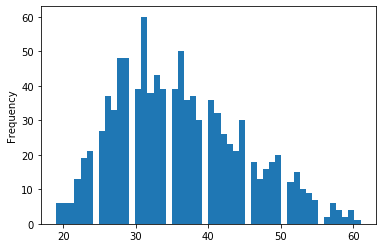

In [9]:
#Create the histagram of the age field
ad_data['Age'].plot.hist(bins=50)

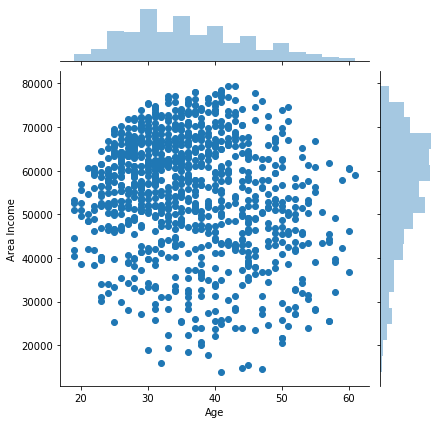

In [42]:
# Nexr Steps is to joint plot b/w age and area income
sns.jointplot(x='Age',y='Area Income',data=ad_data)
plt.savefig('fig1.jpg')

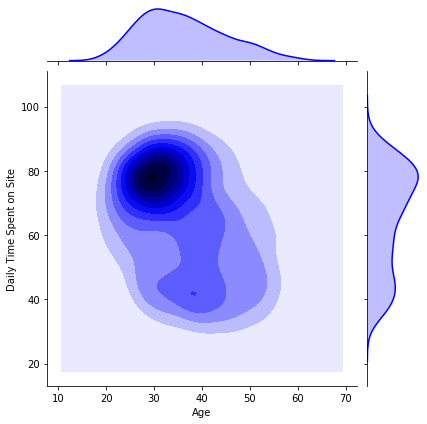

In [43]:
# Create the same plot b/w age and  Daily Time Spent On Site 
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='blue')
plt.savefig('fig2.jpg')

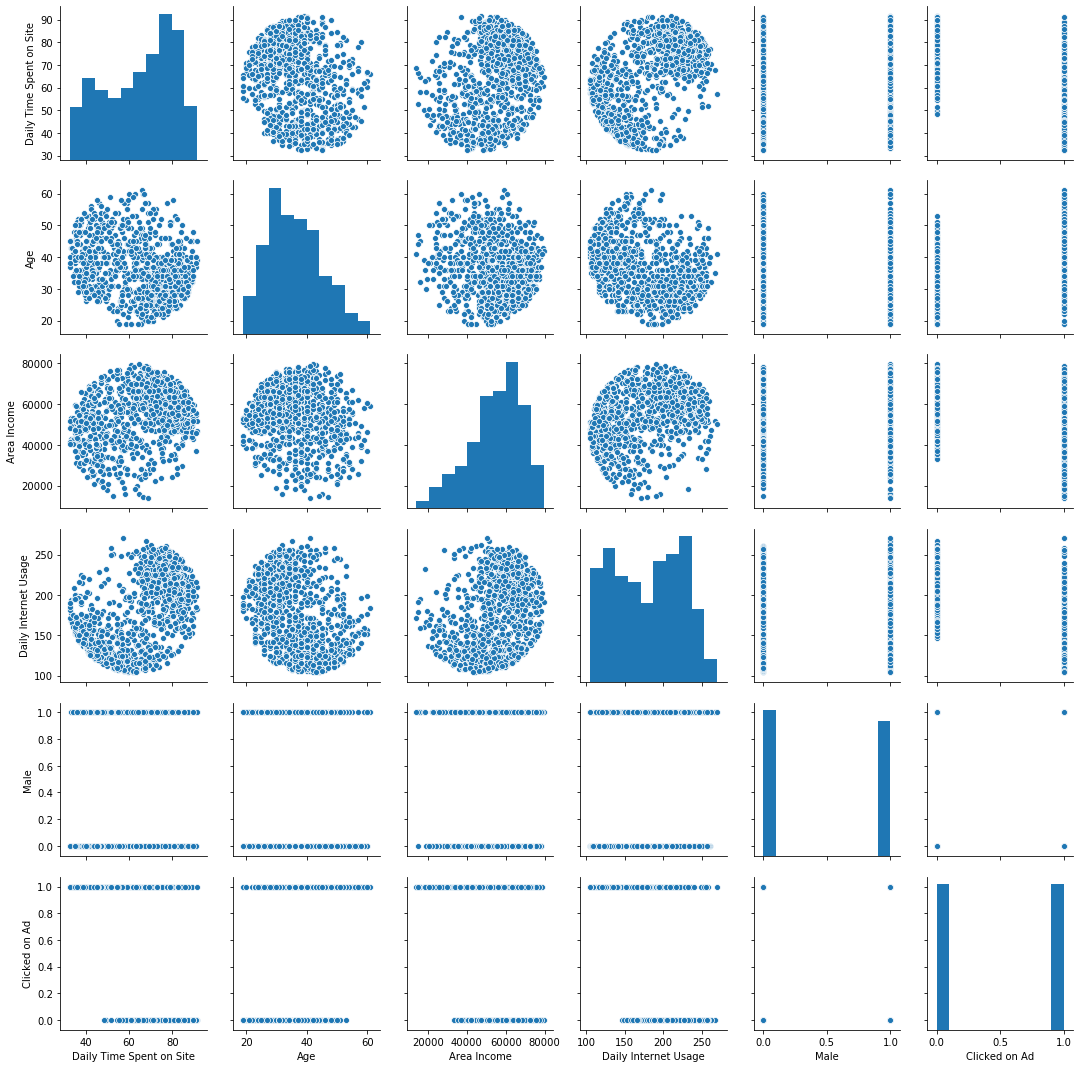

In [44]:
# To create the same joint plot for all features so then use pair plot
sns.pairplot(ad_data)
plt.savefig('fig3.jpg')


# Step 4 : Model Selection,Build and Training Process
### Now is time to split data into training and test set using train_test_split function

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
#First divide the ad_data to feature and target Variable
X=ad_data.drop(['Clicked on Ad','Ad Topic Line','Country','Timestamp','City'],axis=1)
y=ad_data['Clicked on Ad']

In [32]:
#Get the head of features
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [33]:
#Get The head of target variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [34]:
#Divide the data into training and test set 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [35]:
#Initialize The Model
lr=LogisticRegression()

#Fit the model using trainging data
lr.fit(X_train,y_train)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Step 5 : Model Prediction and Evaluation
Now is time to predict and evaluate the model

In [36]:
predictions=lr.predict(X_test)

In [40]:
#Create the classification report of the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [41]:
print(confusion_matrix(y_test,predictions))

[[149   8]
 [ 15 128]]
